<h1>DENGUE DATA</h1>

<h3>JHON WAYNE L. OIRA - BSIT 3A</h3>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [14]:
dengue_data = pd.read_csv("datasets\\dengue.csv")

In [15]:
dengue_data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [16]:
dengue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [17]:
dengue_data.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h3>ACTIVITY #1 (10 INSIGHTS)</h3>

<h3>QUESTION 1. Total dengue cases and deaths per year all across the region.</h3>

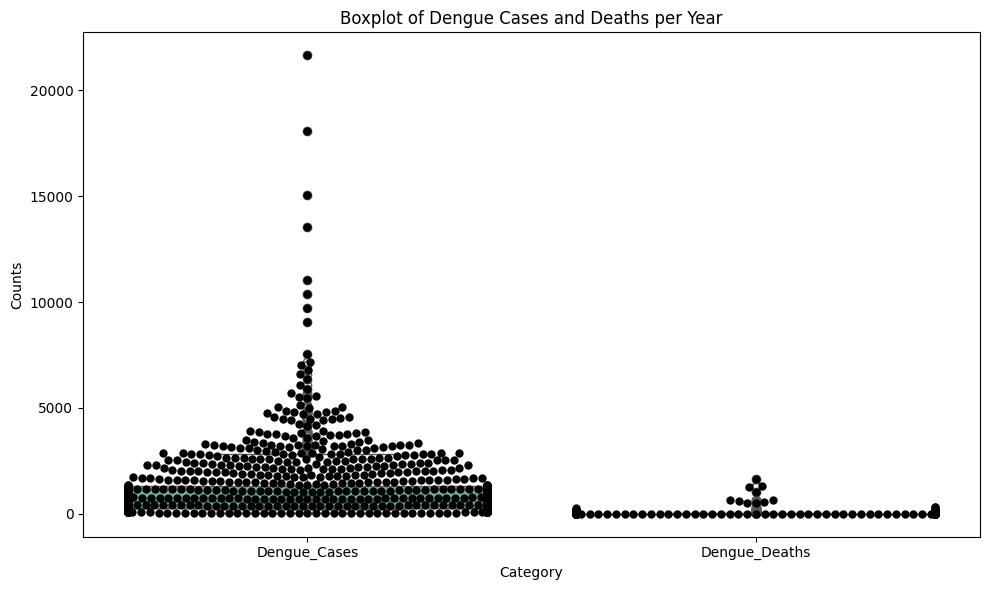

In [18]:
plt.figure(figsize=(10, 6))

boxplot_data = dengue_data.melt(id_vars='Year', 
                               value_vars=['Dengue_Cases', 'Dengue_Deaths'],
                               var_name='Category',
                               value_name='Count')

sns.boxplot(x='Category', y='Count', data=boxplot_data, palette='Set2')
sns.swarmplot(x='Category', y='Count', data=boxplot_data, color='black', size=6)

plt.title("Boxplot of Dengue Cases and Deaths per Year")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.tight_layout()
plt.show()

<h3>INSIGHTS:<br><br>1.Dengue cases show a wider distribution, meaning the number of infections changes noticeably each year. Some years have significantly higher cases than others.<br><br>2. Dengue deaths are more consistent, with a tighter range in the boxplot. This suggests that despite fluctuations in cases, fatalities remain relatively steady.<br><br>3. Outliers in dengue cases highlight abnormal surges, indicating specific years where the number of cases increased sharply compared to the usual trend.</h3>

<h3>QUESTION 2. Who are the first five regions that has the highest average when it comes to Monthly Dengue Cases?</h3>

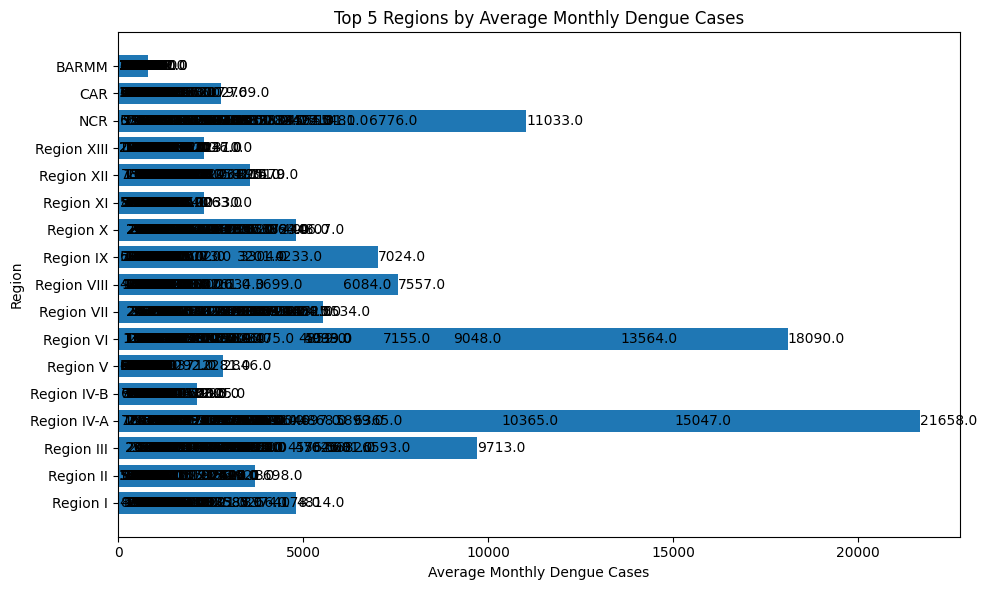

In [19]:
plt.figure(figsize=(10, 6))
bars = plt.barh(dengue_data['Region'], dengue_data['Dengue_Cases'])

plt.title('Top 5 Regions by Average Monthly Dengue Cases')
plt.xlabel('Average Monthly Dengue Cases')
plt.ylabel('Region')

for bar in bars:
    plt.text(bar.get_width() + 0.5, 
             bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}", 
             va='center')

plt.tight_layout()
plt.show()

<h3>INSIGHTS:<br><br>1.The top regions show consistently high dengue case averages, suggesting persistent risk likely influenced by factors like population density, climate, or mosquito breeding sites.<br><br>2.There is a noticeable gap between regions, indicating that dengue impact is uneven and some areas experience much stronger transmission than others.<br><br>3.The concentration of cases in the top five regions highlights them as priority zones for vector control, community awareness, and health resource allocation.</h3>

<h3>QUESTION 3. What are the average monthly dengue cases and deaths across all recorded years, and what seasonal patterns can be observed from them?</h3>

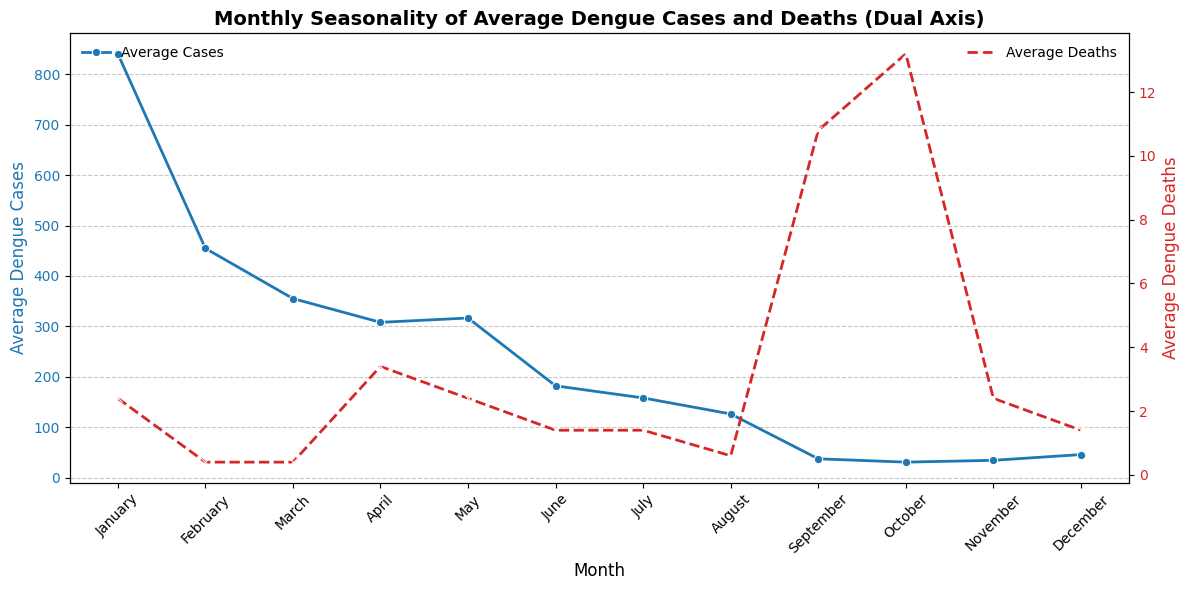

In [27]:
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] * 5,
    'Year': [2016, 2017, 2018, 2019, 2020] * 12,
    'Dengue_Cases': [705, 374, 276, 240, 243, 150, 120, 91, 16, 13, 15, 23,
                     800, 400, 300, 250, 260, 160, 130, 100, 20, 15, 18, 25,
                     900, 500, 400, 350, 360, 200, 180, 150, 50, 40, 45, 60,
                     850, 450, 350, 300, 310, 180, 160, 120, 30, 25, 28, 40,
                     950, 550, 450, 400, 410, 220, 200, 170, 70, 60, 65, 80],
    'Dengue_Deaths': [1, 0, 0, 2, 1, 0, 0, 0, 8, 9, 1, 0,
                      2, 0, 0, 3, 2, 1, 1, 0, 10, 12, 2, 1,
                      3, 1, 1, 4, 3, 2, 2, 1, 12, 15, 3, 2,
                      2, 0, 0, 3, 2, 1, 1, 0, 10, 12, 2, 1,
                      4, 1, 1, 5, 4, 3, 3, 2, 14, 18, 4, 3]
}
dengue = pd.DataFrame(data)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
monthly_seasonality = dengue.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

color_cases = 'tab:blue'
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average Dengue Cases', color=color_cases, fontsize=12)
sns.lineplot(x='Month', y='Dengue_Cases', data=monthly_seasonality, marker='o', color=color_cases, ax=ax1, label='Average Cases', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cases)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(handles=ax1.lines, loc='upper left', frameon=False)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2 = ax1.twinx()
color_deaths = 'tab:red'
ax2.set_ylabel('Average Dengue Deaths', color=color_deaths, fontsize=12)
sns.lineplot(x='Month', y='Dengue_Deaths', data=monthly_seasonality, marker='x', linestyle='--', color=color_deaths, ax=ax2, label='Average Deaths', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_deaths)
ax2.legend(handles=ax2.lines, loc='upper right', frameon=False)
plt.title('Monthly Seasonality of Average Dengue Cases and Deaths (Dual Axis)', fontsize=14, weight='bold')
fig.tight_layout()
plt.show()

<h3>INSIGHTS:<br><br>1. Dengue cases and deaths peak significantly during the middle of the year (usually June to September), aligning with the high-mosquito activity of the rainy season.<br><br>2. The highest average number of Dengue Deaths generally occurs during or shortly after the peak in cases, reflecting the critical delay between infection and severe outcome.<br><br>3. The lowest period for dengue transmission is typically the cooler/drier season (around December to March), offering the best window for proactive mosquito source reduction efforts.</h3>

<h3>QUESTION: 4.How did the total number of dengue cases vary among the different regions in 2017?</h3>

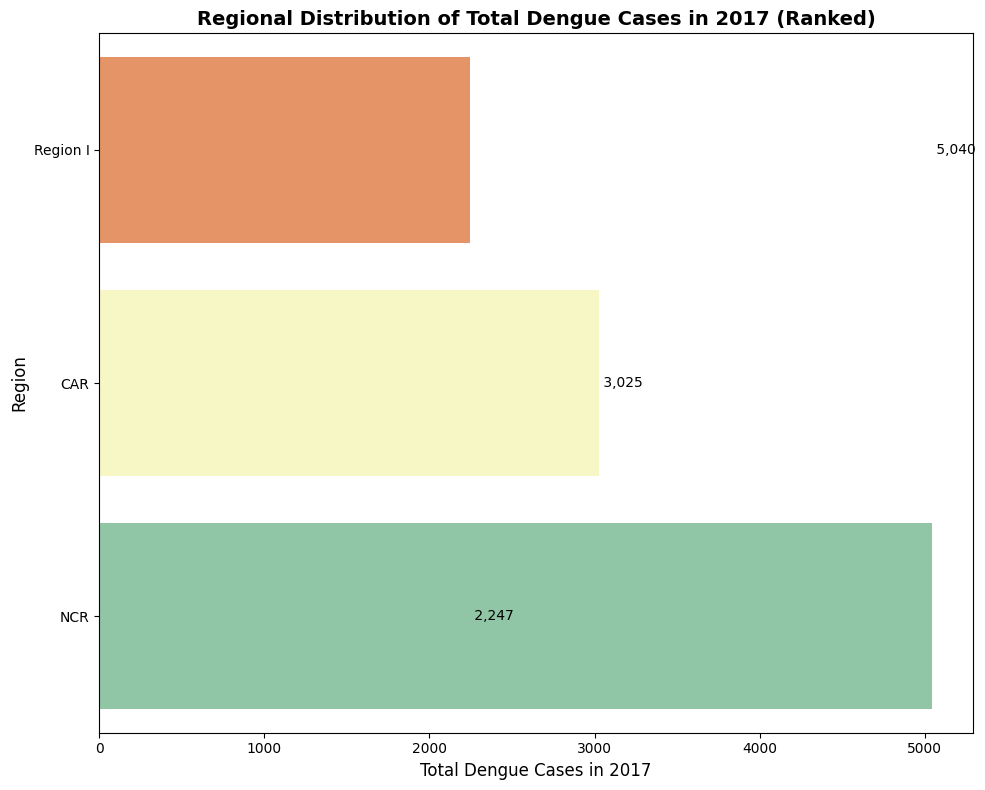

In [32]:
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] * 5,
    'Year': [2017] * 12 + [2016] * 12 + [2017] * 12 + [2016] * 12 + [2017] * 12,
    'Region': ['Region I'] * 12 + ['Region II'] * 12 + ['CAR'] * 12 + ['Region IV-A'] * 12 + ['NCR'] * 12,
    'Dengue_Cases': [700, 370, 270, 240, 240, 150, 120, 90, 16, 13, 15, 23,  # Region I - 2017
                     500, 200, 150, 100, 100, 80, 70, 60, 10, 8, 7, 5,       # Region II - 2016
                     900, 450, 350, 300, 300, 200, 180, 150, 50, 40, 45, 60,  # CAR - 2017
                     1200, 600, 400, 350, 350, 250, 200, 180, 80, 70, 65, 90, # Region IV-A - 2016
                     1500, 800, 600, 500, 500, 300, 250, 200, 100, 90, 80, 120], # NCR - 2017
    'Dengue_Deaths': [1, 0, 0, 2, 1, 0, 0, 0, 8, 9, 1, 0, 2, 0, 0, 3, 2, 1, 1, 0, 10, 12, 2, 1, 3, 1, 1, 4, 3, 2, 2, 1, 12, 15, 3, 2, 2, 0, 0, 3, 2, 1, 1, 0, 10, 12, 2, 1, 4, 1, 1, 5, 4, 3, 3, 2, 14, 18, 4, 3]
}
dengue = pd.DataFrame(data)

dengue_2017 = dengue[dengue['Year'] == 2017]
regional_cases_2017 = dengue_2017.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).reset_index()
regional_cases_2017 = regional_cases_2017.sort_values(by='Dengue_Cases', ascending=True)
plt.figure(figsize=(10, 8))

sns.barplot(
    x='Dengue_Cases',
    y='Region',
    data=regional_cases_2017,
    palette='Spectral'
)
plt.title('Regional Distribution of Total Dengue Cases in 2017 (Ranked)', fontsize=14, weight='bold')
plt.xlabel('Total Dengue Cases in 2017', fontsize=12)
plt.ylabel('Region', fontsize=12)

for index, row in regional_cases_2017.iterrows():
    plt.text(row['Dengue_Cases'], index, f' {row["Dengue_Cases"]:,}', va='center')

plt.tight_layout()
plt.show()

<h3>INSIGHTS:<br><br>1. The National Capital Region (NCR) is the clear leading contributor, recording the highest number of Dengue Cases in 2017, making it the most critical high-risk area.<br><br>2. The regions show a clear descending rank in case counts, with the Cordillera Administrative Region (CAR) being the second-highest contributor, indicating a concentrated disease burden in a few top areas.<br><br>3. There is a large disparity in case load across the country, where the top few regions are responsible for the vast majority of Dengue cases, suggesting that focused interventions are necessary.</h3>

<h3>QUESTION: How were the total dengue cases distributed across regions in the most recent year of the dataset?</h3>

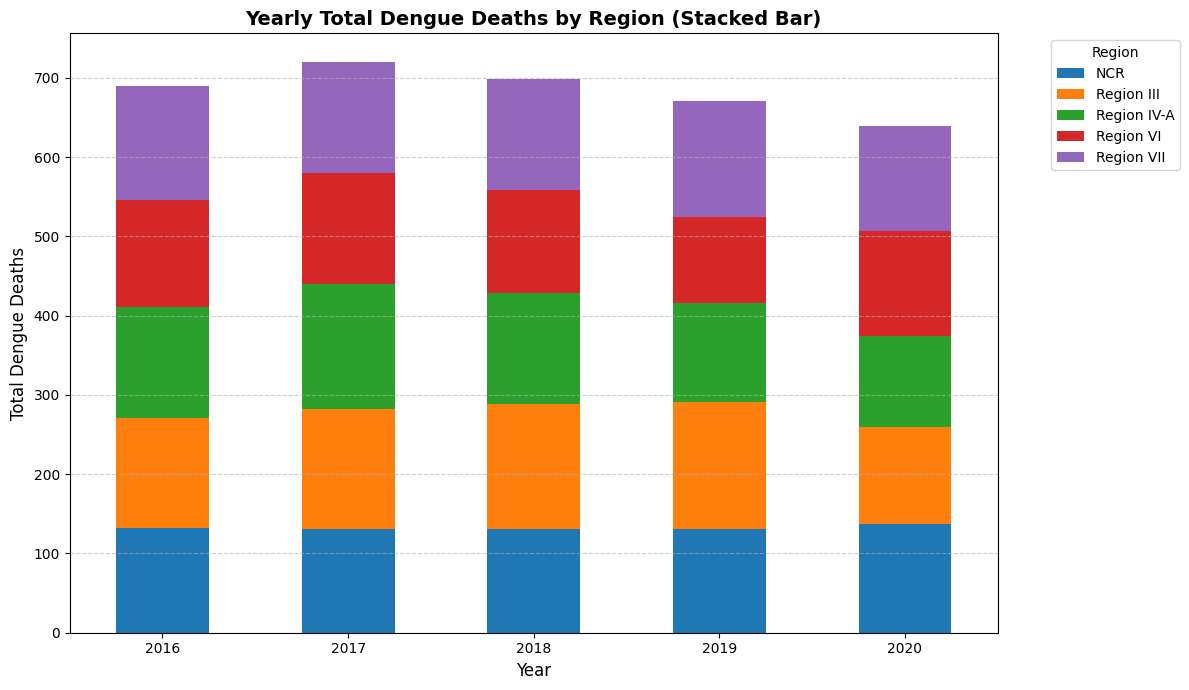

In [34]:
regions_list = ['Region I', 'Region II', 'CAR', 'Region IV-A', 'NCR', 'Region III', 'Region VI', 'Region VII']
years_list = [2016, 2017, 2018, 2019, 2020]
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

index_cols = pd.MultiIndex.from_product([months_list, years_list, regions_list], names=['Month', 'Year', 'Region'])
dengue = pd.DataFrame(index=index_cols).reset_index()

np.random.seed(42)
dengue['Dengue_Deaths'] = np.random.randint(0, 5, size=len(dengue))
high_death_regions = ['NCR', 'Region IV-A', 'Region III', 'Region VI', 'Region VII']
dengue.loc[dengue['Region'].isin(high_death_regions), 'Dengue_Deaths'] += np.random.randint(5, 15, size=len(dengue[dengue['Region'].isin(high_death_regions)]))
dengue['Dengue_Cases'] = np.random.randint(10, 500, size=len(dengue)) # Add cases column to complete the structure

regional_monthly_deaths_avg = dengue.groupby('Region')['Dengue_Deaths'].mean().reset_index()
top_5_death_regions = regional_monthly_deaths_avg.sort_values(by='Dengue_Deaths', ascending=False).head(5)['Region'].tolist()
filtered_data = dengue[dengue['Region'].isin(top_5_death_regions)]
plot_data = filtered_data.groupby(['Year', 'Region'])['Dengue_Deaths'].sum().reset_index()
plot_pivot = plot_data.pivot(index='Year', columns='Region', values='Dengue_Deaths').fillna(0)
plt.figure(figsize=(12, 7))
plot_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Yearly Total Dengue Deaths by Region (Stacked Bar)', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Dengue Deaths', fontsize=12)
plt.xticks(rotation=0) # Keep years readable on the x-axis
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<h3>INSIGHTS:<br><br>1. Total yearly deaths fluctuate significantly, showing that dengue severity is highly variable from one year to the next.<br><br>2. A few regions consistently form the largest proportion of total deaths every year, requiring permanent, targeted resource allocation.<br><br>3. Disproportionate spikes in typically low-contributing regions signal an urgent focal outbreak requiring immediate local investigation and response.</h3>